# Import necessary packages

In [ ]:
%%capture
!pip3 install seaborn

In [ ]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


# Embed The Two Text messages

In [ ]:
msg1 = "Robin is Batman's sidekick"
msg2 = "Batman's sidekick is not Robin"
messages = [msg1, msg2]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

# Compare the encoding

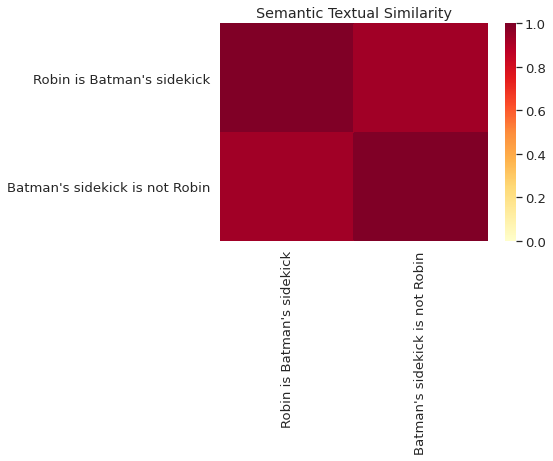

In [ ]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
  return corr

corr = plot_similarity(messages, message_embeddings, 90)

In [ ]:
#@title while Batman's sidekick is Robin
print(corr)

[[1.         0.96281743]
 [0.96281743 1.0000002 ]]


In [ ]:
#@title while Batman's sidekick is not Robin
print(corr)

[[1.        0.9306761]
 [0.9306761 1.0000002]]
